<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Mnist_with_drawingPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/techwithtim


https://github.com/techwithtim/Number-Guesser-Neural-Net

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection

In [3]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



##Data Collecting

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'
!kaggle competitions download -c digit-recognizer
!unzip \*.zip && rm *.zip

 52% 8.00M/15.3M [00:00<00:00, 79.7MB/s]
100% 15.3M/15.3M [00:00<00:00, 52.5MB/s]
Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

train: 42000 samples with labels

test: 28000 samples without labels

submission: 28000 labels for test

features: 784

In [10]:
train.shape, test.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

##Data Preprocessing

In [11]:
train.iloc[0][train.iloc[0] != 0], test.iloc[0][test.iloc[0] != 0]

(label         1
 pixel132    188
 pixel133    255
 pixel134     94
 pixel159    191
            ... 
 pixel626    250
 pixel627    131
 pixel652    214
 pixel653    218
 pixel654     95
 Name: 0, Length: 98, dtype: int64, pixel122    10
 pixel123    17
 pixel124    17
 pixel125    17
 pixel126    17
             ..
 pixel599    30
 pixel600    15
 pixel601    10
 pixel610    14
 pixel611     6
 Name: 0, Length: 215, dtype: int64)

our images are not scaled so we have to rescale them

In [12]:
X = train.drop(["label"], axis=1).values / 255
Y = train["label"].values
test /= 255
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=77, test_size=0.2)

x_train: 33600  (%80)

x_test:  8400   (%20)

In [13]:
x_train.shape, x_test.shape

((33600, 784), (8400, 784))

In [14]:
784 ** 0.5

28.0

784 is 28*28

Text(0.5, 1.0, '9')

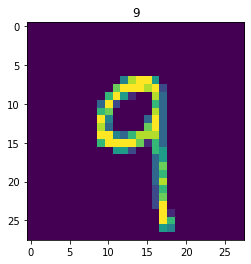

In [15]:
n = 1297
sample = x_train[n].reshape(28, 28)
plt.imshow(sample)
plt.title(y_train[n])

#Machine Learning Models

In [17]:
def model_scores(model):
  s = datetime.datetime.now()
  pred = model.predict(x_test)
  res = sum(pred == y_test)/len(y_test)
  dic = {"train" : model.score(x_train, y_train),
         "Test" : model.score(x_test, y_test)}  

  print("Train Score: " , model.score(x_train, y_train))
  print("Test Score: " , model.score(x_test, y_test))
  print(metrics.classification_report(y_test, pred))
  print(f"Spend time is: {datetime.datetime.now().minute - s.minute} Minuts")
  return dic

##model 0: linear

In [18]:
model_0 = linear_model.SGDClassifier()
model_0.fit(x_train, y_train)

SGDClassifier()

In [19]:
model_scores(model_0)

Train Score:  0.9264583333333334
Test Score:  0.9142857142857143
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       802
           1       0.95      0.98      0.96       965
           2       0.89      0.90      0.90       828
           3       0.90      0.89      0.89       891
           4       0.93      0.92      0.92       792
           5       0.85      0.89      0.87       731
           6       0.94      0.95      0.95       853
           7       0.92      0.94      0.93       883
           8       0.91      0.83      0.87       795
           9       0.90      0.87      0.88       860

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Spend time is: 0 Minuts


{'train': 0.9264583333333334, 'Test': 0.9142857142857143}

##Model 1: LogisticRegression

In [ ]:
model_1 = linear_model.LogisticRegression()
model_1.fit(x_train, y_train)

In [25]:
model_scores(model_1)

Train Score:  0.9407142857142857
Test Score:  0.9207142857142857
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       802
           1       0.95      0.97      0.96       965
           2       0.90      0.89      0.90       828
           3       0.90      0.89      0.90       891
           4       0.95      0.92      0.93       792
           5       0.89      0.87      0.88       731
           6       0.95      0.95      0.95       853
           7       0.92      0.94      0.93       883
           8       0.88      0.88      0.88       795
           9       0.89      0.91      0.90       860

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

Spend time is: 0 Minuts


{'train': 0.9407142857142857, 'Test': 0.9207142857142857}

##model 2: Linear SVC

In [26]:
model_2 = svm.LinearSVC()
model_2.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [27]:
model_scores(model_2)

Train Score:  0.9339285714285714
Test Score:  0.91
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       802
           1       0.95      0.98      0.96       965
           2       0.89      0.87      0.88       828
           3       0.89      0.87      0.88       891
           4       0.93      0.92      0.92       792
           5       0.86      0.86      0.86       731
           6       0.94      0.95      0.94       853
           7       0.92      0.93      0.93       883
           8       0.88      0.86      0.87       795
           9       0.88      0.89      0.88       860

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Spend time is: 0 Minuts


{'train': 0.9339285714285714, 'Test': 0.91}

##Model 3: SVC

In [28]:
model_3 = svm.SVC()
model_3.fit(x_train, y_train)

SVC()

In [ ]:
model_scores(model_3)

##Model 4: K neighbors


In [ ]:
model_4 = neighbors.KNeighborsClassifier(n_neighbors=5)
model_4.fit(x_train, y_train)

In [ ]:
# model_scores(model_4)
pred_4 = model_4.predict(x_test)
print(metrics.classification_report(y_test, pred_4))

In [ ]:
# model_scores(model_4)
pred_4 = model_4.predict(x_test)
print(metrics.classification_report(y_test, pred_4))

In [ ]:
sum(pred_4 == y_test) / len(y_test)

In [ ]:
sum(pred_4.reshape(-1, 1) == y_test) / len(y_test)
# len(y_test), len(pred_4)

##Model 5: DecisionTreeClassifier

In [ ]:
model_5 = tree.DecisionTreeClassifier()
model_5.fit(x_train, y_train)

In [ ]:
model_scores(model_5)

##Model 6: RandomForestClassifier

In [ ]:
model_6 = ensemble.RandomForestClassifier()
model_6.fit(x_train, y_train)

In [ ]:
model_scores(model_6)

In [ ]:
model_7 = ensemble.GradientBoostingClassifier()
model_7.fit(x_train, y_train)

In [ ]:
model_scores(model_7)

##The best ML Model

(based on what we have experimented so far.)

is MODEL 3

In [ ]:
precision, recall, thereshold = metrics.precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_thereshold(precision, recall, thereshold):
    fig, ax = plt.subplots()
    plt.plot(thereshold, precision[:-1], 'b--', label='Precision')
    plt.plot(thereshold, recall[:-1], 'g--', label='Recall')
    ax.set_xlim([-40000, 40000])
    plt.legend()

plot_precision_recall_vs_thereshold(precision, recall, thereshold)
plt.show()    

In [ ]:
thereshold_90_percent = thereshold[np.argmax(precision >= 0.92)]
thereshold_90_percent
y_train_predict90 = (y_scores >= thereshold_90_percent)
metrics.precision_score(y_train_5, y_train_predict90)

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  # fig, ax = plt.subplots()
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  # ax.xlabel('')
  plt.legend()
  

In [ ]:
# randomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = model.cross_val_predict(forest_clf, x_train, y_train_5, method='predict_proba')
y_probas_forest

In [ ]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = metrics.roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(sklinear.SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([x[0]])

In [ ]:
def pcaMaker(k, x_std):
  x_meaned = x_std - np.mean(x_std, axis=0)
  cov_mat = x_meaned.T.dot(x_meaned) / (x_std.shape[0] - 1)
  # cov_mat = np.cov(x_meaned, rowvar = False)  
  eigen_values, eigen_vectors = np.linalg.eig(cov_mat.T)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:k]
  X_reduced = eigenvector_subset.T.dot( x_meaned.T).T   
  return X_reduced


x_train_pca = pcaMaker(320, x_train_std)
x_test_pca = np.float64(pcaMaker(320, x_test_std))


## second way: with sklearn.decomposiotion.PCA()
# {'auto', 'full', 'arpack', 'randomized'}
pca = decomposition.PCA(n_components=320)
pca.fit(x_train_std)
# x_train_pca = pca.transform(x_train_std)
# x_test_pca = pca.transform(x_test_std)
num, n= 2000, 10
x_std = preprocessing.StandardScaler().fit_transform(mnist.data)
pca = decomposition.PCA(n_components=n)
x = pca.fit_transform(x_std)
sample2 = pca.inverse_transform(x[num])
sample2.shape = (28, 28)
b = plt.subplot(1, 2, 1)
b.set_title(f'Reduced after PCA_{n}')
plt.imshow(sample2, cmap=plt.cm.gray_r)
matplotlib.image.imsave(f'PCA_{n}.jpeg', sample2, cmap=plt.cm.gray_r)




#Deep Learning Models

In [ ]:
def plot_loss_curves(history):
  hist = history.history
  loss, val_loss = hist["loss"], hist["val_loss"]
  accuracy, val_accuracy = hist["accuracy"], hist["val_accuracy"]
  epochs = range(1, len(hist["loss"])+1)
  plt.title("Accuracy")
  plt.plot(epochs, accuracy, label="Training")
  plt.plot(epochs, val_accuracy, label="Testing")
  plt.legend()
  plt.figure()
  plt.title("Loss")
  plt.plot(epochs, loss, label="Training")
  plt.plot(epochs, val_loss, label="Testing")
  plt.legend()
  plt.show()  

##Model 0: 

In [ ]:
model_0 = tf.keras.Sequential([
  tf.keras.layers.Dense(28, input_shape=(784, )),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(128, activation="relu"),
  # tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation="softmax")
])

model_0.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"
)

In [ ]:
model_0_history = model_0.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

In [ ]:
pred=model_0.predict(x_test)

In [ ]:
pred

##Model 1: CNN

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(128, 3, 1, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(128, 3, 1, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.GlobalMaxPooling2D()(x)

outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

In [ ]:
# tf.one_hot(y_test)
model_1_history=model_1.fit(x_train.reshape((-1 ,28, 28)), y_train, epochs=10, validation_data=(x_test.reshape((-1 ,28, 28)), y_test))

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
preds = model_1.predict(x_test.reshape(-1, 28, 28, 1))

In [ ]:
model_1.evaluate(x_train.reshape(-1, 28, 28, 1), y_train), model_1.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

##Comparing trained models of CNN

In [ ]:
#path of 1ll 23 models i have trained so far
# path = "/content/drive/MyDrive/Colab Notebooks/ML Projects/New folder/"
path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
models_dic = {}
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  train_evaluate = model.evaluate(x_train.reshape((-1, 28, 28)), y_train)
  test_evaluate = model.evaluate(x_test.reshape((-1, 28, 28)), y_test) 
  models_dic[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  models_df = pd.DataFrame(models_dic).T

In [ ]:
models_df.sort_values(by=["test_accuracy"], ascending=False)

,train_accuracy,train_loss,test_accuracy,test_loss
18,1.000000,3.176907e-06,0.991786,0.067846
19,1.000000,1.044863e-06,0.991310,0.062082
22,1.000000,6.828502e-05,0.991071,0.055414
20,1.000000,2.188002e-07,0.991071,0.070997
23,1.000000,6.025529e-06,0.990952,0.060588
21,1.000000,1.408385e-05,0.990833,0.050922
15,1.000000,4.471530e-05,0.990476,0.064449
16,1.000000,6.130013e-06,0.990357,0.054814
9,0.999375,2.167474e-03,0.988095,0.065245
17,0.998304,7.563761e-03,0.987976,0.136149


In [ ]:
models_df.sort_values(by=["test_loss"], ascending=True)

,train_accuracy,train_loss,test_accuracy,test_loss
4,0.999077,4.757093e-03,0.987619,0.045633
2,0.994911,1.712773e-02,0.984762,0.048800
11,0.999286,3.533017e-03,0.987857,0.048961
3,0.996964,1.204487e-02,0.984405,0.049163
12,0.998482,5.923007e-03,0.987143,0.049397
21,1.000000,1.408385e-05,0.990833,0.050922
1,0.996935,1.149080e-02,0.985952,0.051452
16,1.000000,6.130013e-06,0.990357,0.054814
22,1.000000,6.828502e-05,0.991071,0.055414
13,0.999018,2.983594e-03,0.987381,0.055670


###The best Deep Learning models are 4 and 18 and they don't different a lot

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/ML Projects/New folder/"
path = "/content/drive/MyDrive/Colab Notebooks/New folder/"

model_4 = tf.keras.models.load_model(path + f"m4.h5")
model_18 = tf.keras.models.load_model(path + f"m18.h5")

###Creating the Submission file

In [ ]:
pred_18 = model_18.predict(test.values.reshape((-1, 28, 28)))
pred_4 = model_4.predict(test.values.reshape((-1, 28, 28)))
pred_4 = np.argmax(pred_4, axis=1)
pred_18 = np.argmax(pred_18, axis=1)
len(pred_4 == pred_18) / len(pred_4)
submission = pred_4
submission

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
# tf.Tensor(op=[232,32,32,3,3,3], dtype=tf.float32, value_index=[1,1,1,1,1,1])
tf.constant([2,3,4,5,5]).numpy()

array([2, 3, 4, 5, 5], dtype=int32)

In [ ]:
n=26374
pred= model_4.predict(test.values[n].reshape((-1, 28, 28)))
plt.imshow(test.values[n].reshape((28, 28)))
plt.title(f"The Number I Predicted is: {np.argmax(pred)} ")

In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/ML Projects/New folder/"
path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
models_preds = []
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  sub = model.predict(test.values.reshape((-1, 28, 28)))
  sub = np.argmax(sub, axis=1)
  models_preds.append(sub)
diff = pd.DataFrame(models_preds)

In [ ]:
diff

In [ ]:
arr=[]
transpose_diff=diff.T
for i in range(len(transpose_diff)):
  item = transpose_diff.iloc[i]
  n=item.unique()
  if len(n) != 1:
    arr.append([i, len(n), n, item.value_counts().to_list()])
misspredictions = pd.DataFrame(arr, columns=["Id", "Count", "Unique_Items", "Unique_Items_Count"])

In [ ]:
the_most_missunderstod_ones = misspredictions.sort_values(["Unique_Items_Count"])
the_most_missunderstod_ones

,Id,Count,Unique_Items,Unique_Items_Count
426,4341,5,"[0, 6, 3, 2, 8]","[7, 7, 4, 3, 2]"
798,8337,5,"[0, 4, 2, 9, 8]","[8, 6, 4, 3, 2]"
1697,17583,6,"[2, 4, 6, 3, 1, 5]","[8, 7, 3, 2, 2, 1]"
767,8031,4,"[8, 7, 3, 9]","[8, 7, 5, 3]"
2563,26392,5,"[2, 7, 8, 3, 9]","[8, 7, 6, 1, 1]"
...,...,...,...,...
552,5669,2,"[2, 8]","[22, 1]"
1484,15617,2,"[9, 5]","[22, 1]"
553,5684,2,"[3, 2]","[22, 1]"
548,5620,2,"[2, 5]","[22, 1]"


In [ ]:
for i in range(len(test)):
  id = the_most_missunderstod_ones.Id.values[i]
  print(i, the_most_missunderstod_ones.iloc[i])
  plt.figure()
  plt.imshow(test.iloc[id].values.reshape((28, 28)))
  plt.title(f"The Number I Predicted is: {submission[id]}")
  plt.show()
  answer = input()
  if answer =="Quit": break
  if answer.isdigit():
    submission[id] = int(answer)

In [ ]:
diff[0].unique()

array([2])

In [ ]:
arr=[]
transpose_diff=diff.T
for i in range(len(transpose_diff)):
  item = transpose_diff.iloc[i]
  temp=item.unique()
  arr.append(temp[0])
save_file = pd.DataFrame(arr, columns=["Label"])
save_file.to_csv("/content/sample_submission.csv")

#The Final Selection

In [ ]:
sub = pd.read_csv("/content/sample_submission.csv")

In [ ]:
#path of 1ll 23 models i have trained so far
# path = "/content/drive/MyDrive/Colab Notebooks/ML Projects/New folder/"
path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
m_d = {}
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  model.fit(X.reshape((-1, 28, 28))//10, Y//10, epochs = 5, validation_data=(test.values.reshape((-1, 28, 28))//10, sub.Label.values//10))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  models_d = pd.DataFrame(m_d).T

In [ ]:
# models_d.to_csv("/content/drive/MyDrive/Colab Notebooks/FinalComapring.csv")

In [ ]:
models_d.sort_values(by="test_accuracy", ascending=False)

,train_accuracy,train_loss,test_accuracy,test_loss
10,0.933500,0.294131,0.923536,0.396406
17,0.926357,0.699339,0.914821,0.949701
5,0.888024,0.942263,0.881821,1.112346
22,0.743167,2.127851,0.737821,2.228649
15,0.615714,5.434259,0.617214,5.467914
21,0.377571,12.077907,0.376250,12.150851
23,0.359214,12.857657,0.364607,12.993781
14,0.343810,9.292270,0.344786,9.358514
9,0.272905,17.205099,0.273536,17.370552
18,0.186095,24.097271,0.186536,24.048954


In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/New folder/"
path = "/content/drive/MyDrive/New folder/"
m_d = {}
history_list=[]
for p in range(1, 24):
  model_path = path + f"m{p}.h5"
  model = tf.keras.models.load_model(model_path)
  history=model.fit(X.reshape((-1, 28, 28)), Y, epochs = 20, validation_data=(test.values.reshape((-1, 28, 28))//5, sub.Label.values//5))
  train_evaluate = model.evaluate(X.reshape((-1, 28, 28)), Y)
  test_evaluate = model.evaluate(test.values.reshape((-1, 28, 28)), sub.Label.values) 
  model.save(f"temp_m{p}.h5")
  history_list.append(history)
  # m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0]}
  m_d[p] = { "train_accuracy":train_evaluate[1], "train_loss": train_evaluate[0], "test_accuracy":test_evaluate[1], "test_loss": test_evaluate[0], "history":history}
  models_d = pd.DataFrame(m_d).T